**Importing Libraries**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

**Getting data**

In [99]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

**Looking into train dataset**

In [100]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
#info() method is used to see more information of our train dataset.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 rows and 12 columns. 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.  

We can see that Age value is missing for many rows. Out of 891 rows, the Age value is present only in 714 rows. Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have Cabin values.

In [102]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 rows with missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked information.

**Looking into test dataset**

In [103]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Test dataset has 418 rows and 11 columns. 

Survived column is not present in Test data. We have to train our classifier using the Train data and generate predictions (Survived) on Test data.

In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are missing entries for Age in Test dataset as well.

Out of 418 rows in Test dataset, only 332 rows have Age value. Cabin values are also missing in many rows. Only 91 rows out ot 418 have values for Cabin column.

In [105]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 rows with missing Age, 327 rows with missing Cabin and 1 row with missing Fare information.

**With the above information, What features could contribute to a high survival rate ?**

**It would make sense if every feature would be correlated with a high survival rate with the exception of  ‘PassengerId’, ‘Ticket’ and ‘Name’**

# **Data Exploration and visualization**

In this section, we analyze relationship between different features with respect to Survival. We see how different feature values show different survival chance. We also plot different kinds of diagrams to visualize our data and findings

In [106]:
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train_df)*100.0))

print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train_df)*100.0))
print ("Total: %i"%len(train_df))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


**Sex vs Survival**

In [107]:
train_df.groupby('Sex').Survived.value_counts()


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [108]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Females have better survival chance.
When we look at the gender(sex) vs surviving rates, the surviving ratio in females is much more than males’. According to this data, there is a strong correlation between survived and sex columns.


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

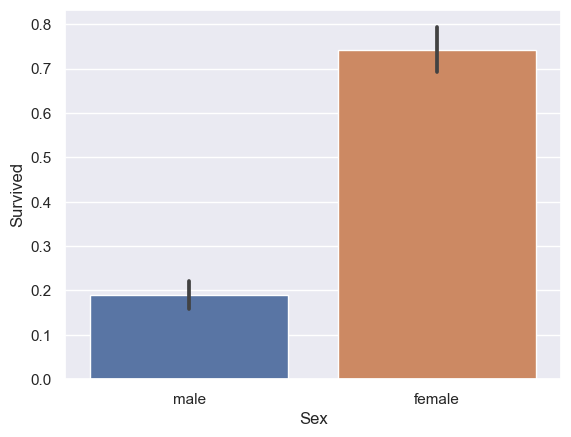

In [109]:
#plotting sex vs survival
sns.barplot(x='Sex', y='Survived', data = train_df)

**Pclass vs. Survival**

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

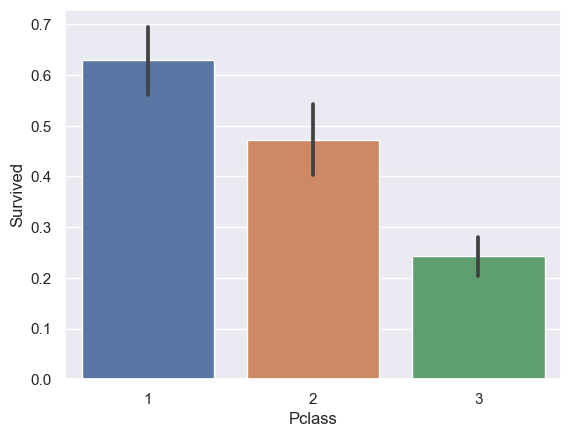

In [110]:
train_df.Pclass.value_counts()
table = train_df.groupby('Pclass').Survived.value_counts()
print (table)

sns.barplot(x='Pclass', y='Survived', data = train_df)

Higher class passengers have better survival chance.

**Pclass & Sex vs. Survival**

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

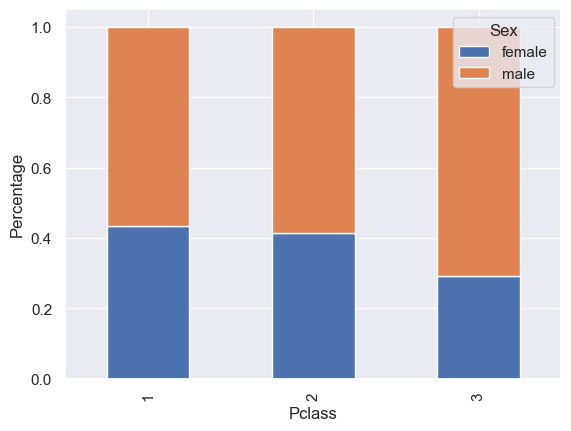

In [111]:
tab = pd.crosstab(train_df['Pclass'], train_df['Sex'])
print (tab)


tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')


Above, we can see how many males and females are there in each Pclass. We then plot a stacked bar diagram with that information. We found that there are more males among the 3rd Pclass passengers.

**Pclass, Sex & Embarked vs. Survival**

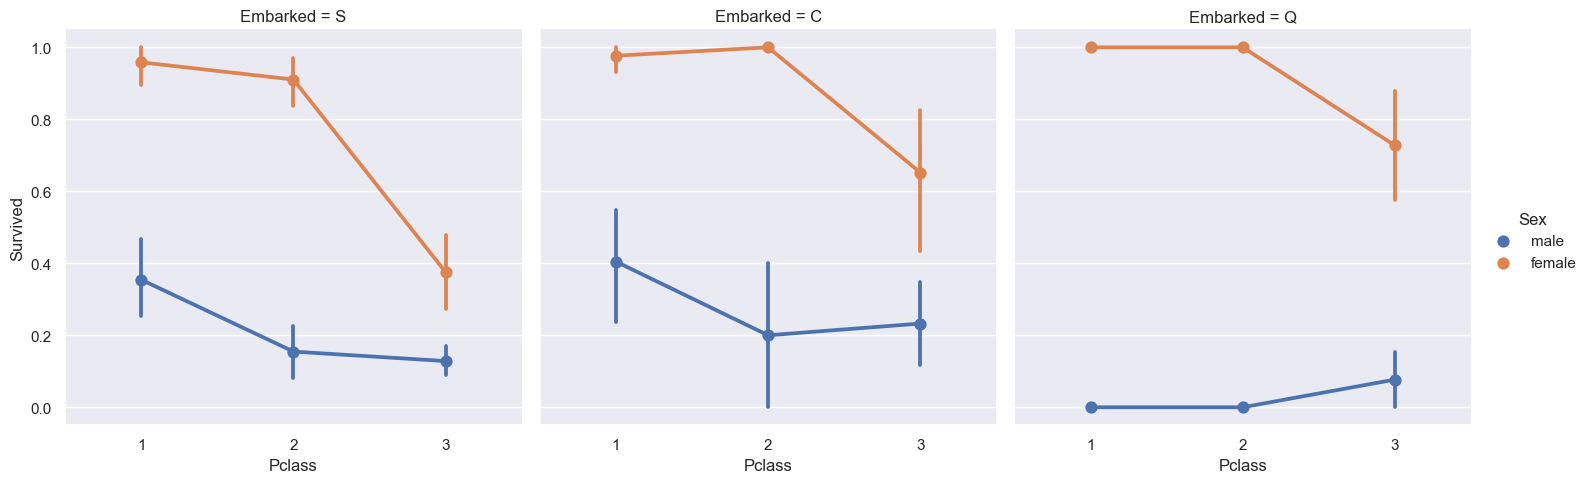

In [112]:
sns.factorplot(x ='Pclass', y ='Survived', hue ='Sex', col ='Embarked', data = train_df)

From the above plot, it can be seen that:

Almost all females from Pclass 1 and 2 survived.
Females dying were mostly from 3rd Pclass.
Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

**Embarked vs. Survived**

In [113]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

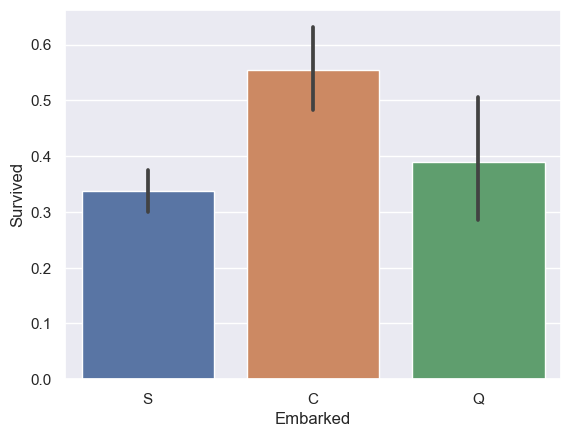

In [114]:
sns.barplot(x ='Embarked', y ='Survived', data = train_df)

**Parch vs. Survival**

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

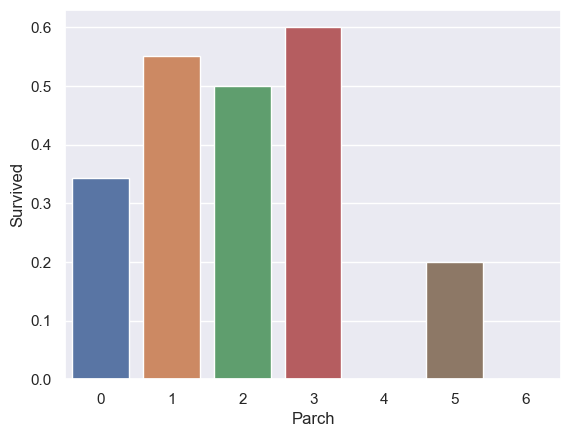

In [115]:
a = train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()
print (a)

sns.barplot(x='Parch', y='Survived', ci=None, data = train_df) # ci=None will hide the error bar

**Age vs. Survival**

<AxesSubplot:xlabel='Sex', ylabel='Age'>

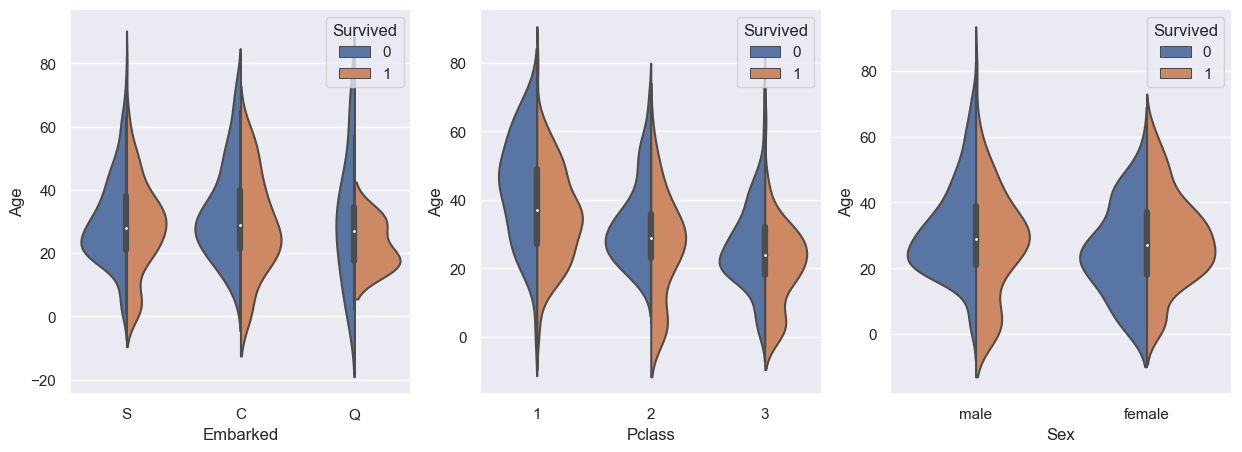

In [116]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data = train_df, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data = train_df, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data = train_df, split=True, ax=ax3)


From Pclass violinplot, we can see that:

1st Pclass has very few children as compared to other two classes.

1st Plcass has more old people as compared to other two classes.

Almost all children (between age 0 to 10) of 2nd Pclass survived.

Most children of 3rd Pclass survived.

Younger people of 1st Pclass survived as compared to its older people.

From Sex violinplot, we can see that:

Most male children (between age 0 to 14) survived.
Females with age between 18 to 40 have better survival chance.

**Correlating Features**

**Heatmap of Correlation between different features:**

*Positive numbers = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.*

*Negative numbers = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa*.

In our case, we focus on which features have strong positive or negative correlation with the Survived feature

<Figure size 1500x600 with 0 Axes>

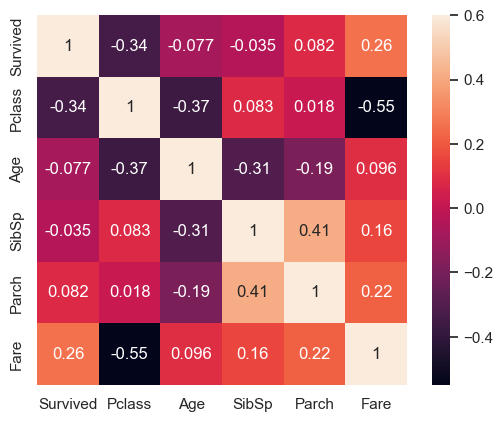

<Figure size 1500x600 with 0 Axes>

In [117]:
sns.heatmap(train_df.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

plt.figure(figsize=(15,6))

# **Feature Engineering and Modelling**

**Feature Extraction**

In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

**Name Feature**

In [118]:
#extracting titles from Name column.

combined_data = [train_df, test_df] # combining train and test dataset

for dataset in combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
    

We have added a new column named Title in the Train dataset with the Title present in the particular passenger name. We now replace some less common titles with the name "Other".

In [119]:
for dataset in combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')


    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [120]:
# converting the categorical Title values into numeric form.

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in combined_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

**Sex Feature**

converting the categorical value of Sex into numeric. We represent 0 as female and 1 as male.

In [121]:
for dataset in combined_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

**Embarked Feature**

There are empty values for some rows for Embarked column. So we will deal with the nan values first.

In [122]:
#Let's check the number of passengers for each Embarked category.

train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

 **category "S" has maximum passengers. Hence, we replace "nan" values with "S".**

In [123]:
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

#now we convert the categorical value of Embarked into numeric. We represent 0 as S, 1 as C and 2 as Q.

for dataset in combined_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

**Age Feature**

We first fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age).

We then create a new column named AgeBand. This categorizes age into 5 different age range.

In [124]:
for dataset in combined_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)


print (train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())



         AgeBand  Survived
0  (-0.08, 16.0]  0.532110
1   (16.0, 32.0]  0.356979
2   (32.0, 48.0]  0.366038
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [125]:
# maping Age according to AgeBand.

for dataset in combined_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

**Fare Feature**

Replace missing Fare values with the median of Fare.

In [126]:
#Replacing missing Fare values with the median of Fare.

for dataset in combined_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())

In [127]:
#Create FareBand. We divide the Fare into 4 category range.

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

print (train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())


          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [128]:
#Map Fare according to FareBand

for dataset in combined_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
      
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

**SibSp & Parch Feature**

Combining SibSp & Parch feature, we create a new feature named FamilySize.

In [129]:
for dataset in combined_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


About data shows that:

Having FamilySize upto 4 (from 2 to 4) has better survival chance.

FamilySize = 1, i.e. travelling alone has less survival chance.

Large FamilySize (size of 5 and above) also have less survival chance.

Let's create a new feature named IsAlone. This feature is used to check how is the survival chance while travelling alone as compared to travelling with family.

In [130]:
for dataset in combined_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


This shows that travelling alone has only 30% survival chance.

**Feature Selection**

We drop unnecessary columns/features and keep only the useful ones for our experiment.
 Column PassengerId is only dropped from Train set because we need PassengerId in Test set.

In [131]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']

train_df = train_df.drop(features_drop, axis=1)

test_df = test_df.drop(features_drop, axis=1)

train_df = train_df.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [132]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,0,0,1,2,0
1,1,1,1,2,3,1,3,2,0
2,1,3,1,1,1,0,2,1,1
3,1,1,1,2,3,0,3,2,0
4,0,3,0,2,1,0,1,1,1


In [133]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,2,1,1,1
1,893,3,1,2,0,0,3,2,0
2,894,2,0,3,1,2,1,1,1
3,895,3,0,1,1,0,1,1,1
4,896,3,1,1,1,0,3,3,0


We are done with Feature Selection/Engineering. Now, we are ready to train a classifier with our feature set.

**Splitting data into train and test set on which the models can be evaluated on later**

In [134]:
X = train_df[["Pclass", "Age", "Sex", "Embarked", "Title", "FamilySize", "IsAlone", "Fare"]]
y = train_df["Survived"]

ID = test_df["PassengerId"] # saving the test set PassengerId for submission file
test_df = test_df.drop("PassengerId", axis=1)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

we will now create our pipeline object, define the functions that should be applied and define a grid with the parameters we want to tune and the range from which RandomizedSearchCV() should draw from.

In [136]:
steps_rf = [("scaler", preprocessing.StandardScaler()), 
            ("rf_class", RandomForestClassifier(random_state=123))]
pipeline_rf = Pipeline(steps_rf)

# define our hyperparameter grid
n_estimators = list(np.arange(200, 2001, 200))
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(10, 101, 10))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 8]
bootstrap = [True, False]
param_dist = {"rf_class__n_estimators": n_estimators,
              "rf_class__max_features": max_features,
              "rf_class__max_depth": max_depth,
              "rf_class__min_samples_split": min_samples_split,
              "rf_class__min_samples_leaf": min_samples_leaf,
              "rf_class__bootstrap": bootstrap}

We can now start to narrow down the range for our hyperparameters by using RandomizedSearchCV() to get a first hint of the ideally chosen hyperparameters for our data.

In [137]:
cv_random_rf = RandomizedSearchCV(pipeline_rf, param_dist, cv=5, n_iter=50, 
                                  n_jobs=16, verbose=1)

In [138]:
cv_random_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf_class',
                                              RandomForestClassifier(random_state=123))]),
                   n_iter=50, n_jobs=16,
                   param_distributions={'rf_class__bootstrap': [True, False],
                                        'rf_class__max_depth': [10, 20, 30, 40,
                                                                50, 60, 70, 80,
                                                                90, 100, None],
                                        'rf_class__max_features': ['auto',
                                                                   'sqrt',
                                                                   'log2'],
                                        'rf_class__min_samples_leaf': [1, 2, 4,
                                                                       8],
           

In [139]:
cv_random_rf.best_params_

{'rf_class__n_estimators': 1800,
 'rf_class__min_samples_split': 10,
 'rf_class__min_samples_leaf': 1,
 'rf_class__max_features': 'auto',
 'rf_class__max_depth': 40,
 'rf_class__bootstrap': True}

Based on the chosen parameters from RandomizedSearchCV() we can now manually decrease the range of the hyperparameters to be tested and use GridSearchCV() as before to find the best parameters for our model.

In [140]:
n_estimators_2 = list(np.arange(1800, 2001, 50))
max_depth_2 = list(np.arange(50, 91, 10))
max_features_2 = ["auto"]
min_samples_split_2 = [5, 10, 15]
min_samples_leaf_2 = [2, 4, 6]
bootstrap_2 = [True]
param_grid = {"rf_class__n_estimators": n_estimators_2,
              "rf_class__max_depth": max_depth_2,
              "rf_class__max_features": max_features_2,
              "rf_class__min_samples_split": min_samples_split_2,
              "rf_class__min_samples_leaf": min_samples_leaf_2,
              "rf_class__bootstrap": bootstrap_2}

In [141]:
cv_rf = GridSearchCV(pipeline_rf, param_grid, cv=5, n_jobs=16, verbose=1)
cv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf_class',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=16,
             param_grid={'rf_class__bootstrap': [True],
                         'rf_class__max_depth': [50, 60, 70, 80, 90],
                         'rf_class__max_features': ['auto'],
                         'rf_class__min_samples_leaf': [2, 4, 6],
                         'rf_class__min_samples_split': [5, 10, 15],
                         'rf_class__n_estimators': [1800, 1850, 1900, 1950,
                                                    2000]},
             verbose=1)

In [142]:
cv_rf.best_params_

{'rf_class__bootstrap': True,
 'rf_class__max_depth': 50,
 'rf_class__max_features': 'auto',
 'rf_class__min_samples_leaf': 4,
 'rf_class__min_samples_split': 15,
 'rf_class__n_estimators': 1850}

We now can evaluate our model on our hold out test set using the accuracy metric.

In [143]:
y_pred_rf = cv_rf.predict(X_test)
round(accuracy_score(y_test, y_pred_rf), 4)

0.7836

We get an accuracy of 0.7836, which means that the model correctly classified 78.4% of the unseen test data, which is pretty good. We can also plot the confusion matrix.

[Text(0.5, 15.049999999999999, 'True label'),
 Text(42.25, 0.5, 'Predicted Label')]

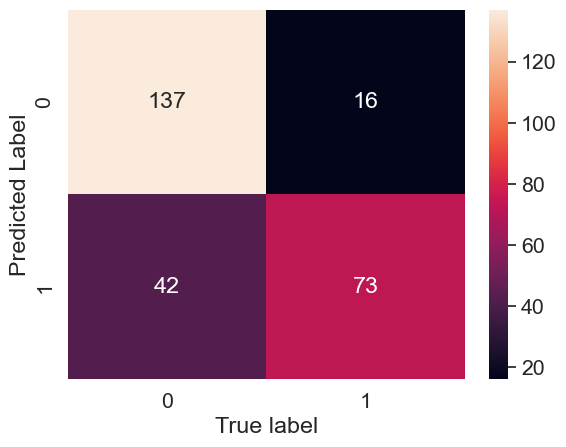

In [144]:
cm_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_rf))
sns.set(font_scale=1.4)
cm_rf = sns.heatmap(cm_rf, annot=True, fmt="g")
cm_rf.set(xlabel="True label", ylabel="Predicted Label")

In [145]:
pred_rf = cv_rf.predict(test_df)
submiss_rf = {"PassengerId":ID, "Survived": pred_rf}
submission_rf = pd.DataFrame(submiss_rf)

**XGBoost**

In [147]:
steps_xgb = [("scaler", preprocessing.StandardScaler()), 
             ("xgb", XGBClassifier(objective="binary:logistic", 
                                   eval_metric="auc", random_state=123))]
pipeline_xgb = Pipeline(steps_xgb)

As already done so with our Random Forest model, we first define a grid of hyperparameters and then tune these using RandomizedSearchCV and then GridSearchCV.

In [148]:
learning_rate = list(np.arange(0.01, 0.311, 0.01))
max_depth = list(np.arange(5,51,5))
min_child_weight = list(np.arange(0,11,2))
colsample_bytree = list(np.arange(0.5, 0.91, 0.05))
gamma = [0,1,2,3,4,5]
n_estimators = list(np.arange(100,1001,100))
param_dist_xgb = {"xgb__learning_rate": learning_rate,
              "xgb__max_depth": max_depth,
              "xgb__min_child_weight": min_child_weight,
              "xgb__colsample_bytree": colsample_bytree,
              "xgb__gamma": gamma,
              "xgb__n_estimators": n_estimators}

In [149]:
cv_random_xgb = RandomizedSearchCV(pipeline_xgb, param_dist_xgb, cv=5, 
                                   n_iter=100, verbose=1)

In [150]:
cv_random_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='auc',
                                                            gamma=None,
                                             

We can now again use the best hyperparameters found by RandomizedSearchCV to do a grid search on a smaller band of hyperparameters to find the best performing ones.

In [151]:
cv_random_xgb.best_params_

{'xgb__n_estimators': 700,
 'xgb__min_child_weight': 2,
 'xgb__max_depth': 25,
 'xgb__learning_rate': 0.3,
 'xgb__gamma': 3,
 'xgb__colsample_bytree': 0.8000000000000003}

In [152]:
learning_rate_2 = list(np.arange(0.2, 0.26, 0.01))
max_depth_2 = list(np.arange(35,50,5))
min_child_weight_2 = list(np.arange(1,4,1))
colsample_bytree_2 = list(np.arange(0.7, 0.95, 0.05))
gamma_2 = [3,4,5]
n_estimators_2 = list(np.arange(100,301,100))
params_xgb = {"xgb__learning_rate": learning_rate_2,
              "xgb__max_depth": max_depth_2,
              "xgb__min_child_weight": min_child_weight_2,
              "xgb__colsample_bytree": colsample_bytree_2,
              "xgb__gamma": gamma_2,
              "xgb__n_estimators": n_estimators_2}

In [153]:
cv_xgb = GridSearchCV(pipeline_xgb, params_xgb, cv=5)
cv_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='auc',
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                      

In [154]:
y_pred_xgb = cv_xgb.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7873134328358209

We get an accuracy of 0.7873 using the tuned XGBoost Classifier, which is almost the same accuracy score as for the RandomForestRegressor.We can again plot the confusion matrix to visualize the predictions and the true values of the hold out set.

[Text(0.5, 15.049999999999999, 'True label'),
 Text(42.25, 0.5, 'Predicted Label')]

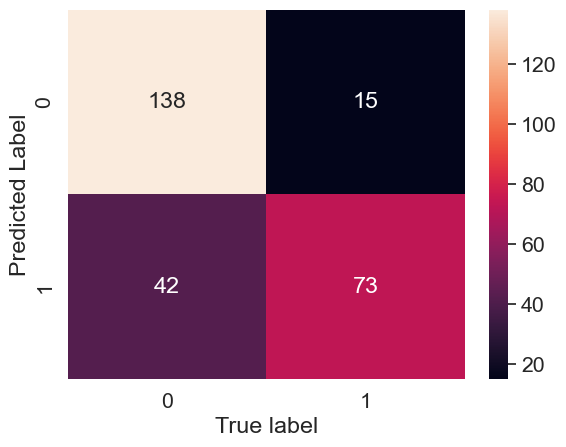

In [155]:
cm_xgb_df = pd.DataFrame(confusion_matrix(y_test, y_pred_xgb))
sns.set(font_scale=1.4)
cm_xgb = sns.heatmap(cm_xgb_df, annot=True, fmt="g")
cm_xgb.set(xlabel="True label", ylabel="Predicted Label")

In [157]:
pred_xgb = cv_xgb.predict(test_df)
submiss_xgb = {"PassengerId":ID, "Survived": pred_xgb}
submission_xgb = pd.DataFrame(submiss_xgb)

In [162]:
submission_rf

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [163]:
submission_xgb

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Among these two models, we choose Random Forest classifier because it has the ability to limit overfitting.**

## Save requirements

In [164]:
requirements = '\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None))

with open('requirements.txt', 'w') as f:
    f.write(requirements)

## Object to export

In [165]:
to_export = {
    "encoder": None,
    "scaler": preprocessing.StandardScaler,
    "model": RandomForestClassifier,
    "pipeline": pipeline_rf,
}

## Exportation

In [166]:
import pickle

with open('ML_items', 'wb') as file:
    pickle.dump(to_export, file)

## Loading after Exportation

In [167]:
with open('ML_items', 'rb') as file:
    loaded_object = pickle.load(file)

In [168]:
loaded_object

{'encoder': None,
 'scaler': sklearn.preprocessing._data.StandardScaler,
 'model': sklearn.ensemble._forest.RandomForestClassifier,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('rf_class', RandomForestClassifier(random_state=123))])}